In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##Read the data
data = pd.read_csv("C:\\Users\\Ganesh Ramu\\Downloads\\churn_dataset.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.isnull().any() 

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
data["gender"]=data["gender"].replace({'Female': 1, 'Male': 0})

In [6]:
data["Partner"]=data["Partner"].replace({'Yes':1, 'No':0})

In [7]:
data["Dependents"]=data["Dependents"].replace({'Yes':1, 'No':0})

In [8]:
data["PhoneService"]=data["PhoneService"].replace({'Yes':1, 'No':0})

In [9]:
data["MultipleLines"]=data["MultipleLines"].replace({'Yes':1, 'No':0,'No phone service':2})

In [10]:
data['Contract']=data['Contract'].replace({'One year':1, 'Month-to-month':0,'Two year':2})

In [11]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [12]:
data['InternetService']=data['InternetService'].replace({"DSL":1,"No":0,"Fiber optic":2})

In [13]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
data['PaymentMethod']=data['PaymentMethod'].replace({"Mailed check":1,"Electronic check":0,"Bank transfer (automatic)":2,'Credit card (automatic)':3})

In [15]:
data['PaperlessBilling']=data['PaperlessBilling'].replace({'Yes':1,'No':0})

In [16]:
data['OnlineSecurity']=data['OnlineSecurity'].replace({'Yes':1,'No':0,'No internet service':2})

In [17]:
data['OnlineBackup']=data['OnlineBackup'].replace({'Yes':1,'No':0,'No internet service':2})

In [18]:
data['DeviceProtection']=data['DeviceProtection'].replace({'Yes':1,'No':0,'No internet service':2})

In [19]:
data['TechSupport']=data['TechSupport'].replace({'Yes':1,'No':0,'No internet service':2})

In [20]:
data['StreamingTV']=data['StreamingTV'].replace({'Yes':1,'No':0,'No internet service':2})

In [21]:
data['StreamingMovies']=data['StreamingMovies'].replace({'Yes':1,'No':0,'No internet service':2})

In [22]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,No
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.5,No
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.9,No
7040,4801-JZAZL,1,0,1,1,11,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,No
7041,8361-LTMKD,0,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.6,Yes


In [23]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [25]:
data['TotalCharges']=data['TotalCharges'].replace({' ':2279},regex=True)

In [26]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000


In [27]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [28]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,No
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.50,No
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.90,No
7040,4801-JZAZL,1,0,1,1,11,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,No
7041,8361-LTMKD,0,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.60,Yes


# labling encoding

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
sc=MinMaxScaler()


In [31]:
data['Encoded_MonthlyCharges']=sc.fit_transform(data[['MonthlyCharges']])

In [32]:
data['Encoded_TotalCharges']=sc.fit_transform(data[['TotalCharges']])

In [33]:
data['Encoded_tenure']=sc.fit_transform(data[['tenure']])

In [34]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Encoded_MonthlyCharges,Encoded_TotalCharges,Encoded_tenure
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,1,0,29.85,29.85,No,0.115423,0.001275,0.013889
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,1,0,1,56.95,1889.50,No,0.385075,0.215867,0.472222
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,1,1,53.85,108.15,Yes,0.354229,0.010310,0.027778
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,1,0,2,42.30,1840.75,No,0.239303,0.210241,0.625000
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,1,0,70.70,151.65,Yes,0.521891,0.015330,0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,...,1,1,1,1,84.80,1990.50,No,0.662189,0.227521,0.333333
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,...,1,1,1,3,103.20,7362.90,No,0.845274,0.847461,1.000000
7040,4801-JZAZL,1,0,1,1,11,0,2,1,1,...,0,0,1,0,29.60,346.45,No,0.112935,0.037809,0.152778
7041,8361-LTMKD,0,1,1,0,4,1,1,2,0,...,0,0,1,1,74.40,306.60,Yes,0.558706,0.033210,0.055556


# spliting

In [35]:
x=data.drop(columns=["Churn","customerID"],axis=1)

In [36]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Encoded_MonthlyCharges,Encoded_TotalCharges,Encoded_tenure
0,1,0,1,0,1,0,2,1,0,1,...,0,0,0,1,0,29.85,29.85,0.115423,0.001275,0.013889
1,0,0,0,0,34,1,0,1,1,0,...,0,0,1,0,1,56.95,1889.50,0.385075,0.215867,0.472222
2,0,0,0,0,2,1,0,1,1,1,...,0,0,0,1,1,53.85,108.15,0.354229,0.010310,0.027778
3,0,0,0,0,45,0,2,1,1,0,...,0,0,1,0,2,42.30,1840.75,0.239303,0.210241,0.625000
4,1,0,0,0,2,1,0,2,0,0,...,0,0,0,1,0,70.70,151.65,0.521891,0.015330,0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,...,1,1,1,1,1,84.80,1990.50,0.662189,0.227521,0.333333
7039,1,0,1,1,72,1,1,2,0,1,...,1,1,1,1,3,103.20,7362.90,0.845274,0.847461,1.000000
7040,1,0,1,1,11,0,2,1,1,0,...,0,0,0,1,0,29.60,346.45,0.112935,0.037809,0.152778
7041,0,1,1,0,4,1,1,2,0,0,...,0,0,0,1,1,74.40,306.60,0.558706,0.033210,0.055556


In [37]:
y=data["Churn"]

In [38]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test ,y_train,y_test=train_test_split (x,y,train_size=0.8,random_state=1)

In [41]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Encoded_MonthlyCharges,Encoded_TotalCharges,Encoded_tenure
1814,0,0,1,1,12,1,0,0,2,2,...,2,2,2,0,1,19.70,258.35,0.014428,0.027643,0.166667
5946,1,0,0,0,42,1,0,1,1,1,...,0,1,1,0,3,73.90,3160.55,0.553731,0.362538,0.583333
3881,0,0,1,0,71,1,1,1,1,1,...,0,0,2,0,2,65.15,4681.75,0.466667,0.538074,0.986111
2389,0,0,1,1,71,1,1,1,1,0,...,1,1,1,0,0,85.45,6300.85,0.668657,0.724908,0.986111
3676,0,0,0,0,30,1,0,1,1,1,...,1,0,1,0,0,70.40,2044.75,0.518905,0.233781,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,1,0,0,9,1,1,2,0,0,...,1,1,0,1,0,100.50,918.60,0.818408,0.103831,0.125000
5192,0,0,0,1,60,1,0,0,2,2,...,2,2,2,0,1,19.95,1189.90,0.016915,0.135137,0.833333
3980,0,0,0,0,28,1,1,2,0,1,...,1,1,0,1,0,105.70,2979.50,0.870149,0.341646,0.388889
235,0,0,0,0,2,1,1,1,0,1,...,0,0,0,1,1,54.40,114.10,0.359701,0.010997,0.027778


In [42]:
y_train

1814     No
5946    Yes
3881     No
2389     No
3676     No
       ... 
905     Yes
5192     No
3980    Yes
235     Yes
5157     No
Name: Churn, Length: 5634, dtype: object

# Build the model(KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_model=KNeighborsClassifier(n_neighbors=7,p=2)

In [45]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [46]:
y_pred = knn_model.predict(x_test)

# Accuray score

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
knn_test=(accuracy_score(y_test,y_pred) *100)
knn_test

78.06955287437899

In [49]:
y_pred_train=knn_model.predict(x_train)

In [50]:
knn_train=accuracy_score(y_train,y_pred_train)*100
knn_train

81.9133830315939

# logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model=LogisticRegression(C=1.0,random_state=2)

In [53]:
log_model.fit(x_train,y_train)

C:\Users\Ganesh Ramu\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [54]:
y_pred_log=log_model.predict(x_test)

# accuracy

In [55]:
log_test=(accuracy_score(y_test,y_pred_log) *100)

In [56]:
log_test

81.61816891412349

In [57]:
y_pred_log_train=log_model.predict(x_train)

In [58]:
y_pred_log_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [59]:
log_train=accuracy_score(y_train,y_pred_log_train)*100

In [60]:
log_train

80.06744763933263

# Support Vector Machines

In [61]:
from sklearn.svm import SVC

In [62]:
svm_model=SVC()

In [63]:
svm_model.fit(x_train,y_train)

SVC()

In [64]:
y_pred_svm=svm_model.predict(x_test)

In [65]:
svm_test=(accuracy_score(y_test,y_pred_svm) *100)

In [66]:
svm_test

75.30163236337827

# decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt_model = DecisionTreeClassifier(criterion="entropy")

In [69]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
y_pred_dt=dt_model.predict(x_test)

In [71]:
dt_test=(accuracy_score(y_test,y_pred_dt) *100)

In [72]:
dt_test

72.95954577714691

In [73]:
y_pred_train_dt=dt_model.predict(x_train)

In [74]:
dt_train=(accuracy_score(y_train,y_pred_train_dt) *100)

In [75]:
dt_train

99.80475683351084

# Booster 

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lor_model= LogisticRegression()

In [79]:
ada_model = AdaBoostClassifier(n_estimators=30)

In [80]:
ada_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=30)

In [81]:
y_pred_ada=ada_model.predict(x_test)

In [82]:
y_pred_ada

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [83]:
ada_test=(accuracy_score(y_test,y_pred_ada) *100)

In [84]:
ada_test

81.12136266855926

In [85]:
y_pred_train_ada=ada_model.predict(x_train)

In [86]:
ada_train=(accuracy_score(y_train,y_pred_train_ada) *100)

In [87]:
ada_train

80.77742279020235

# Gradiant boosting 

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gbm_model=GradientBoostingClassifier(n_estimators=5)

In [91]:
gbm_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=5)

In [97]:
y_pred_gbm=gbm_model.predict(x_test)

In [98]:
gbm_test=(accuracy_score(y_test,y_pred_gbm) *100)

In [99]:
gbm_test

75.30163236337827

In [94]:
y_pred_train_gbm=gbm_model.predict(x_train)

In [100]:
gbm_train=(accuracy_score(y_train,y_pred_train_gbm) *100)

In [101]:
gbm_train

73.00319488817891

# Analysis

In [121]:
models={"ML_algorithms" :["knn","logistic","svm","DT","ada_b","gradient_b"],"Y_TEST":[knn_test,log_test,svm_test,dt_test,ada_test,gbm_test]}

In [122]:
Models=pd.DataFrame(models)

In [117]:
Models

,ML_algorithms,Y_TEST
0,knn,78.069553
1,logistic,81.618169
2,svm,75.301632
3,DT,72.959546
4,ada_b,81.121363
5,gradient_b,75.301632


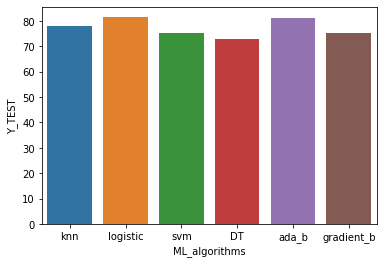

In [125]:
sns.barplot(x='ML_algorithms',y='Y_TEST',data=Models)
plt.show()

### Logistic regression and ada booster is give better performance than other models 